In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv

--2020-11-14 10:52:03--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61896 (60K) [text/plain]
Saving to: ‘sbux.csv’

sbux.csv            100%[===================>]  60.45K  --.-KB/s    in 0.01s   

2020-11-14 10:52:04 (4.51 MB/s) - ‘sbux.csv’ saved [61896/61896]



In [4]:
df = pd.read_csv('sbux.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
print(df.head(),'\n')
print(df.tail())

         date    open    high     low   close   volume  Name
0  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX
1  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX
2  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX
3  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX
4  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX 

            date    open   high    low  close    volume  Name
1254  2018-02-01  56.280  56.42  55.89  56.00  14690146  SBUX
1255  2018-02-02  55.900  56.32  55.70  55.77  15358909  SBUX
1256  2018-02-05  55.530  56.26  54.57  54.69  16059955  SBUX
1257  2018-02-06  53.685  56.06  53.56  55.61  17415065  SBUX
1258  2018-02-07  55.080  55.43  54.44  54.46  13927022  SBUX


In [7]:
df.shape

(1259, 7)

In [8]:
# Convert into numpy array
Data=df.to_numpy()
print(Data.shape)

(1259, 7)


In [9]:
type(Data)

numpy.ndarray

In [10]:
# To predict column 4 (closing price). Specifying column gives a vector of size (1259,)
Closing_price = Data[:, 4].reshape(-1, 1)
Closing_price.shape

(1259, 1)

In [11]:
# Print to visualize
Closing_price

array([[28.185],
       [28.07],
       [28.13],
       ...,
       [54.69],
       [55.61],
       [54.46]], dtype=object)

In [12]:
# Data standardization
scalar = StandardScaler()
Closing_price = scalar.fit_transform(Closing_price)

In [13]:
# Print to visualize
Closing_price

array([[-1.94144714],
       [-1.95251788],
       [-1.94674184],
       ...,
       [ 0.61011874],
       [ 0.6986847 ],
       [ 0.58797726]])

In [14]:
# Train, test split. Again specifying a column: train, test = Closing_price[:index, 0], Closing_price[index:, 0] would have given a vector of size
# (843,) & (416,)
index = int(0.67*len(Closing_price))
train, test = Closing_price[:index], Closing_price[index:]
print(train.shape)
print(test.shape)

(843, 1)
(416, 1)


In [15]:
# Create a new dataset
def create_dataset(dataset, T):
  X, Y = [], []
  for t in range(len(dataset) - T):
    x = dataset[t:(t+T)]
    y = dataset[t+T, 0]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

In [16]:
# Remember input data X have to be NxTxD
# Remember targets have to be a vector
T = 10
X_train, y_train = create_dataset(train, T)
X_test, y_test = create_dataset(test, T)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(833, 10, 1) (833,)
(406, 10, 1) (406,)


In [17]:
M = 20
K = 1
visible = Input(shape=(T, 1))
hidden = LSTM(M)(visible)
output = Dense(K)(hidden)

model = Model(inputs=visible, outputs=output)

In [18]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


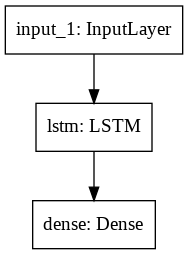

In [19]:
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')

In [20]:
model.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam'
)

In [21]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)           # default batch size = 32. 
                                                                                         # 833/32 = ~27

Epoch 1/10
27/27 [==============================] - 1s 21ms/step - loss: 0.2792 - val_loss: 0.0852
Epoch 2/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0405 - val_loss: 0.0191
Epoch 3/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0220 - val_loss: 0.0198
Epoch 4/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0174 - val_loss: 0.0186
Epoch 5/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.0180
Epoch 6/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0124 - val_loss: 0.0173
Epoch 7/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0112 - val_loss: 0.0159
Epoch 8/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0142
Epoch 9/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.0139
Epoch 10/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0132


In [22]:
r.history.keys()

dict_keys(['loss', 'val_loss'])

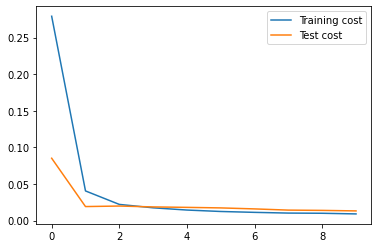

In [23]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()

In [24]:
# Multi step forecast
prediction = []

x = X_test[0]
print(x.shape)

while len(prediction) < len(y_test):
  p = model.predict(x.reshape(1, -1, 1))[0, 0]
  prediction.append(p)

  x = np.roll(x, -1)
  x[-1] = p

(10, 1)


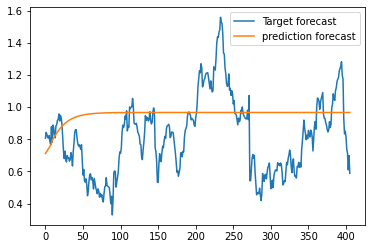

In [25]:
# Model is not making the prediction in time series. Only copying the previous value.
plt.plot(y_test, label='Target forecast')
plt.plot(prediction, label='prediction forecast')
plt.legend()